In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [38]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [39]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
df.shape

(10000, 14)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [42]:
df.duplicated().sum()

0

In [43]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [44]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [45]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [46]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [47]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [59]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [60]:
X_train.shape

(8000, 11)

In [61]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,True,False,True
5140,626,29,4,105767.28,2,0,0,41104.82,False,False,False
2568,612,47,6,130024.87,1,1,1,45750.21,True,False,False
3671,646,52,6,111739.40,2,0,1,68367.18,True,False,False
7427,714,33,8,122017.19,1,0,0,162515.17,False,True,True


In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [63]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [64]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [91]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [92]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 11)                132       
                                                                 
 dense_12 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [95]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5990 - accuracy: 0.7075 - val_loss: 0.5049 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7972 - val_loss: 0.4589 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.8031 - val_loss: 0.4373 - val_accuracy: 0.8037
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8167 - val_loss: 0.4228 - val_accuracy: 0.8181
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8303 - val_loss: 0.4095 - val_accuracy: 0.8294
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8344 - val_loss: 0.3945 - val_accuracy: 0.8369
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8409 - val_loss: 0.3819 - val_accuracy: 0.8400

In [86]:
model.layers[2].get_weights()

[array([[-1.0286037 ],
        [-0.86708283],
        [ 1.2087505 ],
        [-0.7252921 ],
        [-1.1694403 ],
        [-0.5490456 ],
        [-0.8634454 ],
        [-0.36806127],
        [ 0.34524494],
        [ 0.47488752],
        [ 0.7931509 ]], dtype=float32),
 array([0.0247846], dtype=float32)]

In [87]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 824us/step


In [88]:
y_pred=np.where(y_log>0.5,1,0)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.867

In [97]:
import matplotlib.pyplot as plt

In [98]:
history.history

{'loss': [0.5989541411399841,
  0.47595950961112976,
  0.44133809208869934,
  0.42255550622940063,
  0.40782180428504944,
  0.39429977536201477,
  0.3818233609199524,
  0.3721756339073181,
  0.36542031168937683,
  0.360645592212677,
  0.3573947846889496,
  0.35513293743133545,
  0.3533567786216736,
  0.3516117036342621,
  0.34943103790283203,
  0.3484640121459961,
  0.34746548533439636,
  0.3461877405643463,
  0.3452928066253662,
  0.3440258502960205,
  0.3434923589229584,
  0.3421069383621216,
  0.34159794449806213,
  0.3409762978553772,
  0.3400040566921234,
  0.33954012393951416,
  0.338551789522171,
  0.3381557762622833,
  0.33781853318214417,
  0.3373440206050873,
  0.33667999505996704,
  0.33643805980682373,
  0.33543092012405396,
  0.33563753962516785,
  0.3353956639766693,
  0.3350200355052948,
  0.3344954252243042,
  0.3338042199611664,
  0.33300110697746277,
  0.33342063426971436,
  0.33244001865386963,
  0.3319551348686218,
  0.33226948976516724,
  0.3319699764251709,
  0.33

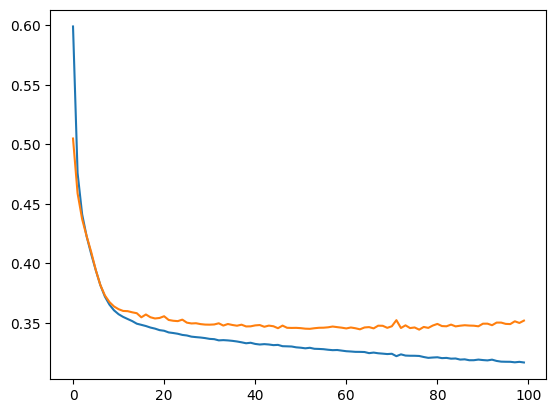

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

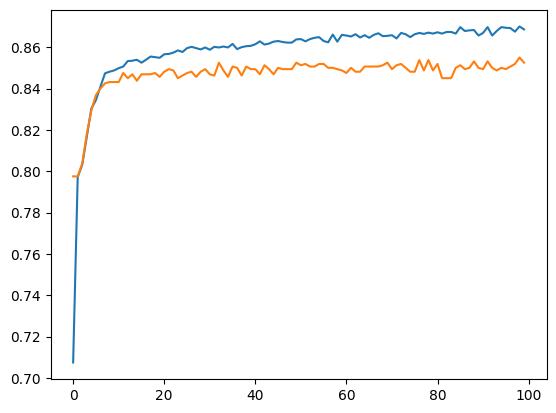

In [101]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])